In [32]:
import os 
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import numpy as np


(<matplotlib.axes._subplots.AxesSubplot at 0x13a0653f308>,
 <matplotlib.image.AxesImage at 0x13a05f63c88>)

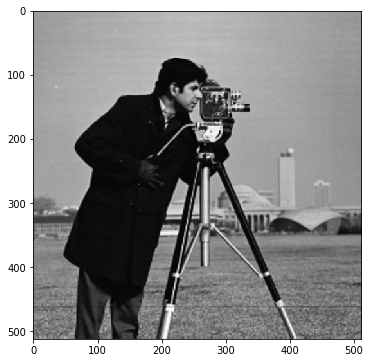

In [34]:
im_1=plt.imread('cameraman.jpg')
im_2=convert_rgb_to_gray_level(im_1)
#im_3=convert_gray_level_to_BW(im_2)
%matplotlib inline 
plt.figure(figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(im_1)
#plt.subplot(1,3,2),plt.imshow(im_2,cmap='gray')
#plt.subplot(1,3,3),plt.imshow(im_2,cmap='gray')



In [35]:
def convert_rgb_to_gray_level(im_1):
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_2[i,j]=get_distance(im_1[i,j,:])
    return im_2

def get_distance(v,w=[1/3,1/3,1/3]):
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d=((a**2)*w1+
       (b**2)*w2+
       (c**2)*w3**.5)
    #d=((a**2)*w1+(b**2)*w2+(c**2)*w3**.5)
    return d
    

In [36]:
def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

def apply_mask(part_of_image):
    mask=get_default_mask_for_mean()
    return sum(sum(part_of_image*mask))

In [39]:
block_1=np.array([1,1,1,1,1,1,1,1,1,]).reshape(3,3)/9
sum(sum(block_1))

1.0

In [40]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [41]:
def get_median_for_55(poi):
    s_1=poi.reshape(1,25)
    s_1.sort()
    return s_1[0,13]

def get_median(poi):
    s_1=poi.reshape(1,9)  #poi.reshape(1,9).sort error
    s_1.sort()
    return s_1[0,4]   # access the row 1-one column 5
    

In [53]:
def get_mean_filter_for_55(im_1):
    #im_1=plt.imread('')
    
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(3,m-3):
        for j in range(3,n-3):
            #i=10,j=10
            poi=im_1[i-2:i+3,j-2:j+3]
            #im_2[i,j]=apply_mask(poi)
            im_2[i,j]=get_median_for_55(poi)
    return im_2


def get_mean_filter(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1] 
    im_2 = np.zeros((m,n))
    for i in range(1, m-1):
        for j in range(1, n-1):
            poi = im_1[i-1:i+2,j-1:j+2]
            im_2[i,j] = get_median(poi)
            
    return im_2

In [54]:
apply_mask(im_2[1:4,1:4])

30319.04253658557

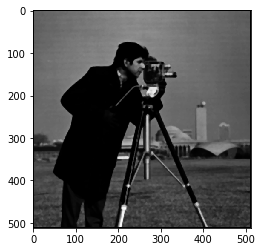

In [55]:
im_55=get_mean_filter_for_55(im_2)
plt.imshow(im_55,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x13a05d8ff88>,
 <matplotlib.image.AxesImage at 0x13a05ddbdc8>)

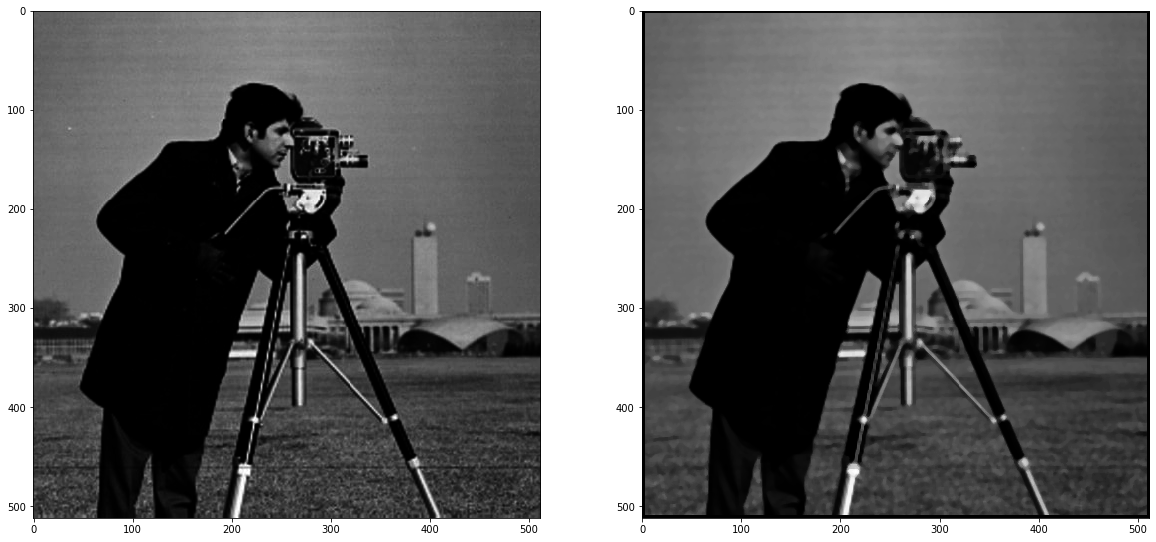

In [46]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(im_2,cmap='gray')
plt.subplot(1,2,2),plt.imshow(im_55,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x13a063bd308>,
 <matplotlib.image.AxesImage at 0x13a063e12c8>)

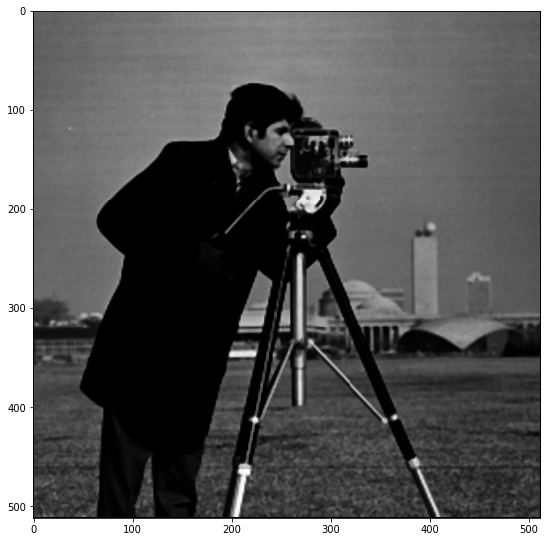

In [56]:
im_555= get_mean_filter(im_2)
plt.figure(figsize=(20,20))
plt.subplot(1,2,2),plt.imshow(im_555,cmap='gray')


In [47]:
im_2[3:6,10:13]


array([[31055.63878672, 31055.63878672, 31055.63878672],
       [31055.63878672, 31055.63878672, 31055.63878672],
       [31055.63878672, 31055.63878672, 31055.63878672]])

In [48]:
s_1=im_2[3:6,10:13].reshape(1,9)
print(s_1)
s_1.sort()
print(s_1)
print(s_1[0,4])

[[31055.63878672 31055.63878672 31055.63878672 31055.63878672
  31055.63878672 31055.63878672 31055.63878672 31055.63878672
  31055.63878672]]
[[31055.63878672 31055.63878672 31055.63878672 31055.63878672
  31055.63878672 31055.63878672 31055.63878672 31055.63878672
  31055.63878672]]
31055.63878671648
